# Hierarchical Clustering 
Agenda today:
- Hierarchical Clustering 
    -  Introduction
    -  How the algorithm is constructed?
    -  Implementing hierarchical algorithm

Goals today:
- Understand how hierarchical clustering finds clusterings in observations
- Compare and contrast hierchical clustering and k-means
- Build and interpret a dendrogram
***
# Introduction 


### Intuition
Clustering is a family of techniques for identifying clusters in a dataset. The goal of clustering is to group the most similar observations together into a cluster. In Hierchical Clustering, we prioritize **similarity** between individual observations.

https://www.saedsayad.com/clustering_hierarchical.htm


# Hierarchical Agglomerative Clustering
Recall K-means clustering where the goal is to assign individual observations to pre-specified number of clusters according to a distance metric (Euclidean) between the centroid and the observation. Hierarchical clustering sets out to group the most similar two observations together from a bottom-up level. We end up with a tree-like diagram named **dendrogram**, which allows us to view the clusterings obtained for each possible number of clusters, from 1 to n. It is up to our discretion as data scientists to decide how many clusters we want. 
***
One disadvantage of K-means clustering is that we have to specify the number of clusters beforehand. The type of hierchical clustering we will learn today is **agglomerative**, or **bottom up**, such that we do not have to specify the number of clusters beforehand. We will now dive into the details of hierchical clustering.
***


### How does the algorithm work

- Compute the proximity matrix between all points
- Let each data point be a cluster
- Merge the two closest clusters and update the proximity matrix
- Interate until only a single cluster remains


<img src='https://cdn-images-1.medium.com/max/1600/1*3pMZjFiiaaLcfSZBKDjbXA.png' img/>

Below is another graphical representation in the feature space:
<img src='https://cdn-images-1.medium.com/max/1200/1*fw1vlNtq2vPFmAXsBy1_dA.jpeg' img/>

Clustering is often shown using dendrograms 

<img src='https://cdn-images-1.medium.com/max/1200/1*JPQRbJDw2E1_HEvwzVTDDw.jpeg' img/>

In [1]:
# code credit -- https://github.com/amueller/mglearn/tree/master/mglearn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import KernelDensity


def plot_agglomerative_algorithm():
    # generate synthetic two-dimensional data
    X, y = make_blobs(random_state=0, n_samples=12)

    agg = AgglomerativeClustering(n_clusters=X.shape[0], compute_full_tree=True).fit(X)

    fig, axes = plt.subplots(X.shape[0] // 5, 5, subplot_kw={'xticks': (),
                                                             'yticks': ()},
                             figsize=(20, 8))

    eps = X.std() / 2

    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    gridpoints = np.c_[xx.ravel().reshape(-1, 1), yy.ravel().reshape(-1, 1)]

    for i, ax in enumerate(axes.ravel()):
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        agg.n_clusters = X.shape[0] - i
        agg.fit(X)
        ax.set_title("Step %d" % i)
        ax.scatter(X[:, 0], X[:, 1], s=60, c='grey')
        bins = np.bincount(agg.labels_)
        for cluster in range(agg.n_clusters):
            if bins[cluster] > 1:
                points = X[agg.labels_ == cluster]
                other_points = X[agg.labels_ != cluster]

                kde = KernelDensity(bandwidth=.5).fit(points)
                scores = kde.score_samples(gridpoints)
                score_inside = np.min(kde.score_samples(points))
                score_outside = np.max(kde.score_samples(other_points))
                levels = .8 * score_inside + .2 * score_outside
                ax.contour(xx, yy, scores.reshape(100, 100), levels=[levels],
                           colors='k', linestyles='solid', linewidths=2)

    axes[0, 0].set_title("Initialization")


def plot_agglomerative():
    X, y = make_blobs(random_state=0, n_samples=12)
    agg = AgglomerativeClustering(n_clusters=3)

    eps = X.std() / 2.

    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    gridpoints = np.c_[xx.ravel().reshape(-1, 1), yy.ravel().reshape(-1, 1)]

    ax = plt.gca()
    for i, x in enumerate(X):
        ax.text(x[0] + .1, x[1], "%d" % i, horizontalalignment='left', verticalalignment='center')

    ax.scatter(X[:, 0], X[:, 1], s=60, c='grey')
    ax.set_xticks(())
    ax.set_yticks(())

    for i in range(11):
        agg.n_clusters = X.shape[0] - i
        agg.fit(X)

        bins = np.bincount(agg.labels_)
        for cluster in range(agg.n_clusters):
            if bins[cluster] > 1:
                points = X[agg.labels_ == cluster]
                other_points = X[agg.labels_ != cluster]

                kde = KernelDensity(bandwidth=.5).fit(points)
                scores = kde.score_samples(gridpoints)
                score_inside = np.min(kde.score_samples(points))
                score_outside = np.max(kde.score_samples(other_points))
                levels = .8 * score_inside + .2 * score_outside
                ax.contour(xx, yy, scores.reshape(100, 100), levels=[levels],
                           colors='k', linestyles='solid', linewidths=1)

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

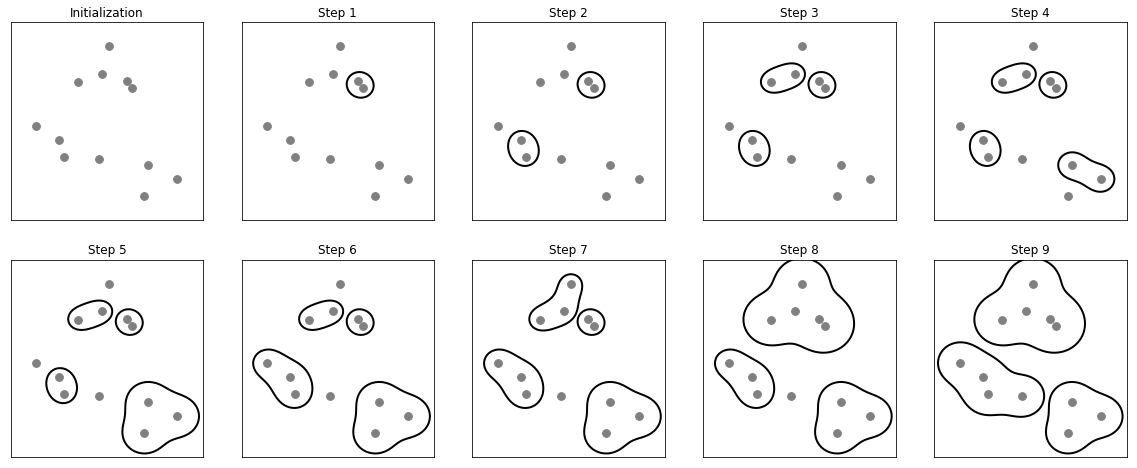

In [2]:
plot_agglomerative_algorithm()

### Types of hierarchical agglomerative clustering 

What are the different ways that we can measure distance between the clusters?

***




#### Single Linkage 
-  Minimum pair-wise distance: for any two clusters, take one observation from each and determine their distance. Do this over and over, until you have identified the overall minimum pair-wise distance. 


![single](https://www.saedsayad.com/images/Clustering_single.png)

#### Complete Linkage
-  The nearest cluster is identified using the maximum distance between two clusters. That is, all possible pairwise distances between elements (one from cluster A and one from B) are evaluated and the largest value is used as the distance between clusters A & B. This is sometimes called complete linkage and is also called furthest neighbor.


![completeLinkage](https://www.saedsayad.com/images/Clustering_complete.png)

#### Average Linkage
- The distance between clusters is defined as the average distance between the average values of each of the data points in the clusters. 


![AVERAGELINKAGE](https://www.saedsayad.com/images/Clustering_average.png)

### Ward’s Method 

This approach of calculating the similarity between two clusters is exactly the same as Average Linkage except that Ward’s method calculates the sum of the square of the distances Pi and Pj.

More info ont he different methods:
    
https://towardsdatascience.com/understanding-the-concept-of-hierarchical-clustering-technique-c6e8243758ec

#### Application


How will the choice of your type of linkage impact the model your final clusters? 

*What's the real difference between single linkage and complete linkage?*

### Coded Example

[Here is an explanation for the different parts of the code](https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/)

(100, 2)


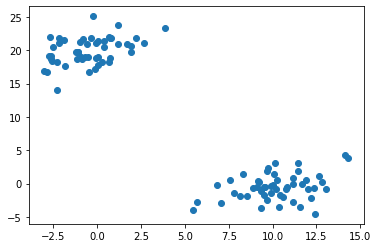

In [3]:
# lets generate some data and look at an example of hierarchical agglomerative clustering 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# generate two clusters: a with 100 points, b with 50:
np.random.seed(1000)  
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[50,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
X = np.concatenate((a, b),)
print(X.shape)  # 150 samples with 2 dimensions
plt.scatter(X[:,0], X[:,1])

In [4]:
# construct dendrogram in scipy
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X, 'single')

In [5]:
Z

array([[7.00000000e+01, 9.10000000e+01, 6.04706721e-02, 2.00000000e+00],
       [5.30000000e+01, 7.50000000e+01, 8.37051268e-02, 2.00000000e+00],
       [1.00000000e+01, 1.60000000e+01, 8.45806591e-02, 2.00000000e+00],
       [5.00000000e+01, 1.00000000e+02, 1.21827328e-01, 3.00000000e+00],
       [6.90000000e+01, 9.40000000e+01, 1.25567165e-01, 2.00000000e+00],
       [6.70000000e+01, 9.80000000e+01, 1.51541344e-01, 2.00000000e+00],
       [7.10000000e+01, 7.60000000e+01, 1.59132742e-01, 2.00000000e+00],
       [3.00000000e+00, 1.80000000e+01, 1.69253544e-01, 2.00000000e+00],
       [6.10000000e+01, 8.50000000e+01, 1.77864677e-01, 2.00000000e+00],
       [6.80000000e+01, 1.01000000e+02, 1.86803680e-01, 3.00000000e+00],
       [6.40000000e+01, 1.05000000e+02, 2.06225963e-01, 3.00000000e+00],
       [7.00000000e+00, 1.50000000e+01, 2.44988082e-01, 2.00000000e+00],
       [1.00000000e+00, 8.00000000e+00, 2.60528041e-01, 2.00000000e+00],
       [8.70000000e+01, 9.70000000e+01, 2.61575154e

In [6]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(Z, pdist(X))
#c

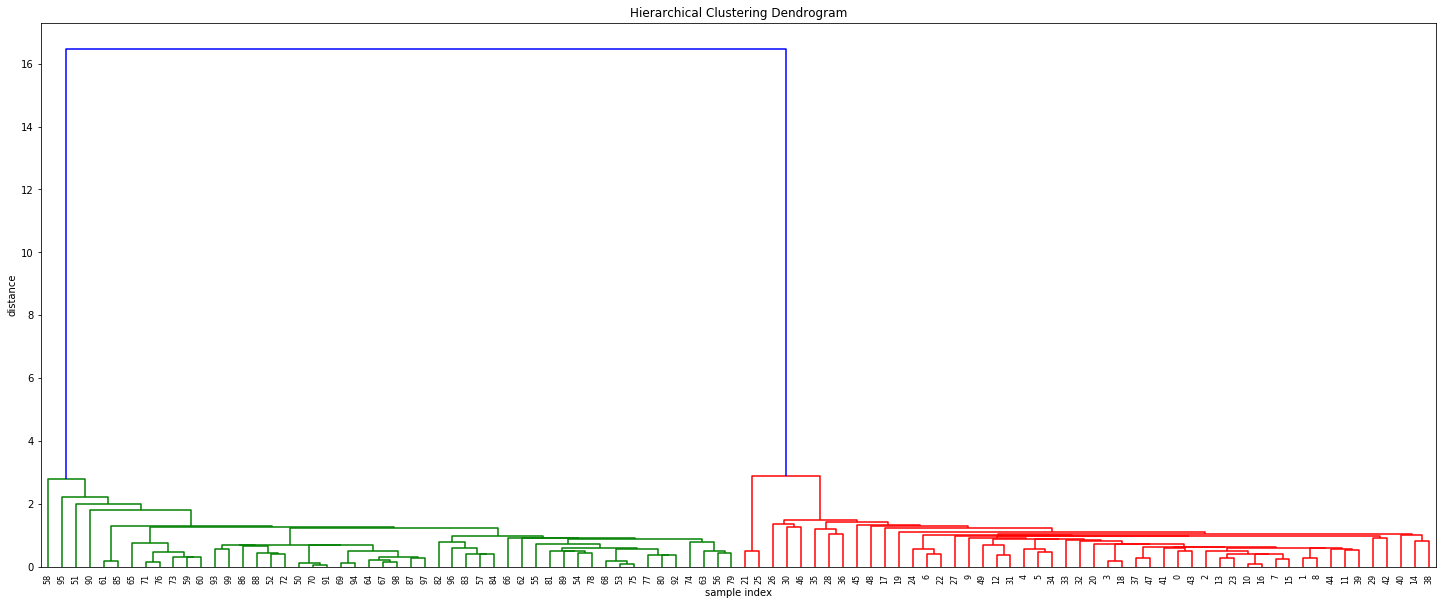

In [7]:
# calculate and construct the dendrogram 
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

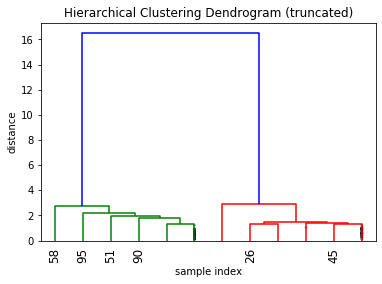

In [8]:
# trimming and truncating the dendrogram 
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

# from documentation of "lastp"
# The last p non-singleton formed in the linkage are the only non-leaf nodes in the linkage; 
# they correspond to rows Z[n-p-2:end] in Z. All other non-singleton clusters are contracted into leaf nodes.

In [9]:
# we can also use the scikitlearn module hierarchical clustering to perform the same task 
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import KernelDensity
np.random.seed(2000)

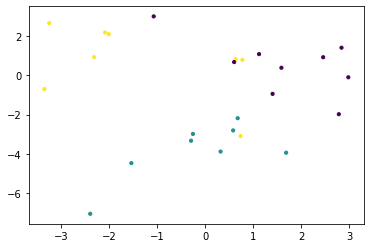

In [10]:
k = 3
m = 25
X, y = make_blobs(n_samples= m, n_features=2, centers=k, cluster_std=1.3)

plt.scatter(X[:, 0], X[:, 1], c = y, s = 10);

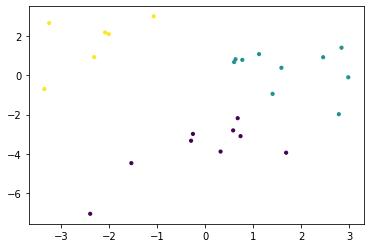

In [11]:
agg_clust = AgglomerativeClustering(n_clusters=3)
agg_clust
assigned_clust = agg_clust.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c = assigned_clust, s = 10);

In [12]:
# try clustering on the iris dataset 
from sklearn.datasets import load_iris
iris = load_iris()
# in this case, we won't be working with predicting labels, so we will only use the features (X)
X_iris = iris.data
y_iris = iris.target

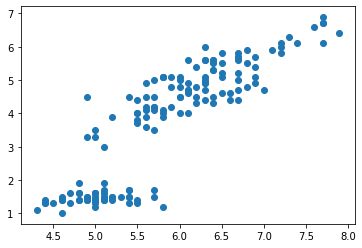

In [13]:
plt.scatter(X_iris[:,0],X_iris[:,2])

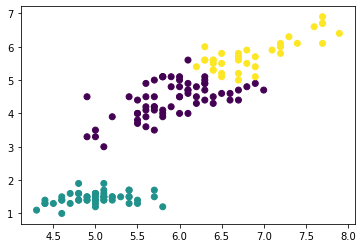

In [19]:
iris_cluster = AgglomerativeClustering(n_clusters=3)
iris_cluster
pred_iris_clust = iris_cluster.fit_predict(X_iris)
plt.scatter(X_iris[:, 0], X_iris[:, 2], c = pred_iris_clust);

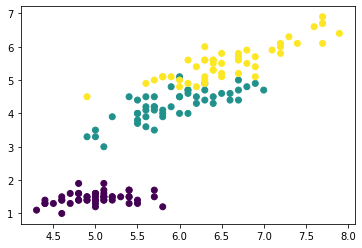

In [20]:
# compare it to the actual truth 
plt.scatter(X_iris[:,0],X_iris[:,2], c = y_iris)

In [21]:
# evaluation - silhouette score 
from sklearn.metrics import silhouette_score
silhouette_score(X_iris, pred_iris_clust)

0.5543236611296415

### Evaluating number of clusters / Cut points
For hierarchical agglomerative clustering, or clustering in general, it is generally difficult to truly evaluate the results. 



Sometimes, using K-means, K-medoids, or hierarchical clustering, we might have no problem specifying the number of clusters K ahead of time, e.g.,
- Segmenting a client database into K clusters for K salesman 
- Compressing an image using vector quantization, where K controls the compression rate

Other times, K is implicitly defined by cutting a hierarchical clustering tree at a given height, e.g., designing a clever radio system or placing cell phone towers.

But in most exploratory applications, the number of clusters K is unknown. So we are left asking the question: what is the “right” value of K?

### This is a hard problem

**Why is it hard?**

- For high deminsional data, it is impossible visually investigate how many clusters make sense.
- There is no ***correct*** answer to this problem. 

**Why is it important?**


- E.g., it might mean a big difference scientifically if we were convinced that there were K = 2 subtypes of breast cancer vs. K = 3 subtypes
- One of the (larger) goals of data mining/statistical learning is automatic inference; choosing K is certainly part of this

### Possible Solutions
- We can visually examine where the natural cutoff is, despite it not sounding exactly statistical, or scientific. 
- We might want to interpret the clusters and assign meanings to them depending on domain-specific knowledge and shape of dendrogram.  
- We can evaluate the quality of our clusters using measurements such as Sihouette score discussed in the k-means lectures. 

## Advantages & Disadvantages of hierarchical clustering

#### Advantages
- Intuitive and easy to implement
- More informative than k-means because it takes individual relationship into consideration
- Allows us to look at dendrogram and decide number of clusters

#### Disadvantages
- Very sensitive to outliers
- Cannot undo the previous merge, which might lead to problems later on 


### Application

Let's now use hierarchical clustering to create clusters from the wine dataset


In [22]:
url="https://raw.githubusercontent.com/aapeebles/kmeans_flatiron/master/Kmeans%20lesson/Wine.csv"
wine =pd.read_csv(url)
features =  wine.drop(columns=['Customer_Segment'])

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(features)
features_scaled = pd.DataFrame(data_scaled, columns=features.columns)


In [24]:
features_scaled.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-8.619821e-16,-8.357859e-17,-8.657245e-16,-1.160121e-16,-1.995907e-17,-2.972030e-16,-4.016762e-16,4.079134e-16,-1.699639e-16,-1.247442e-18,3.717376e-16,2.919013e-16,-7.484650e-18
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246e+00,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-8.854682e-01,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,9.595986e-02,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,8.089974e-01,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515e+00,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


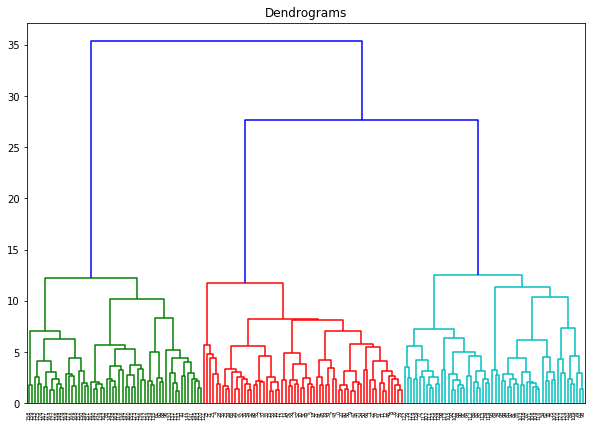

In [26]:

import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(features_scaled, method='ward'))

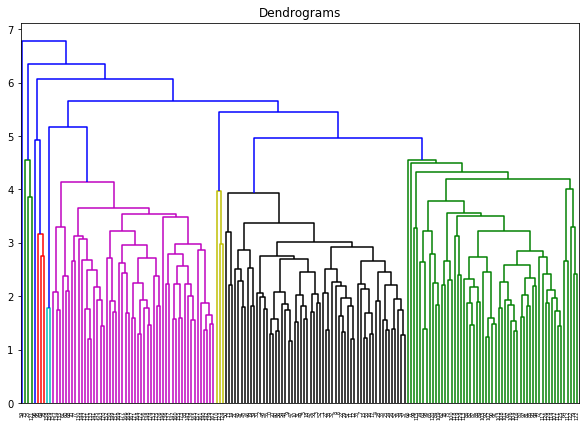

In [27]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(features_scaled, method='average'))

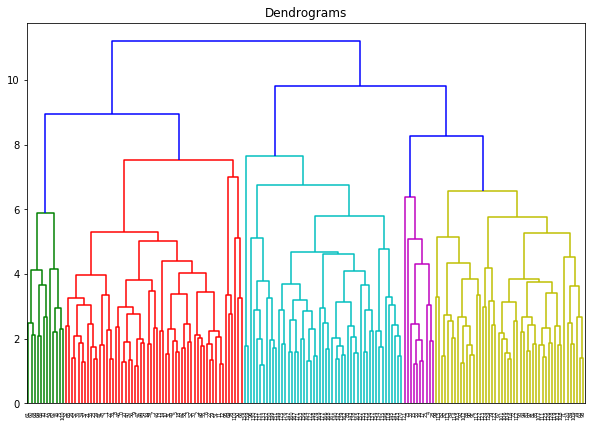

In [28]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(features_scaled, method='complete'))

In [29]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')  
cluster.fit_predict(features_scaled)

array([1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 1, 1, 1, 1,
       1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 3, 3, 3, 3, 2, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 4, 2, 3, 3, 3, 1, 2, 2, 2, 2, 0, 2, 2, 3, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

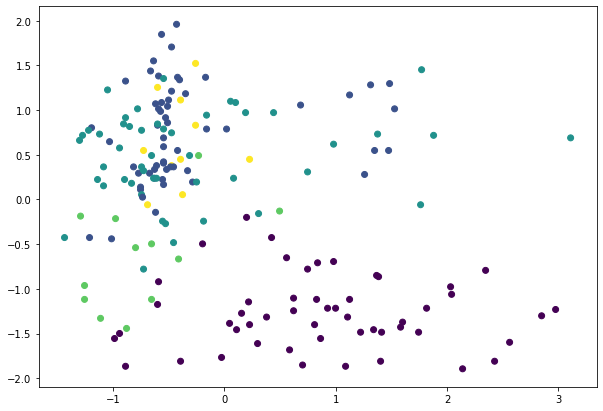

In [31]:
plt.figure(figsize=(10, 7))  
plt.scatter(features_scaled['Malic_Acid'], features_scaled['OD280'], c=cluster.labels_) 